In [ ]:
# Cell 1: Import libraries and load data
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_curve, PrecisionRecallDisplay
import matplotlib.pyplot as plt




,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:

# Load dataset
df = pd.read_csv(r"C:/Users/adity/Downloads/spam_dataset.csv")

# Keep only relevant columns and rename
df = df[['v1', 'v2']]
df.columns = ['label', 'text']

# Encode label as binary: spam=1, ham=0
df['label'] = df['label'].map({'spam': 1, 'ham': 0})

df.head()

,label,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [20]:
# Cell 2: Split dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    df['text'], df['label'], test_size=0.3, random_state=42)


In [21]:
# Cell 3: Vectorize text data using bag of words
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)


In [22]:
# Cell 4: Build and train logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_vec, y_train)


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [23]:
# Cell 5: Predict probabilities and calculate precision-recall curve
y_scores = model.predict_proba(X_test_vec)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)


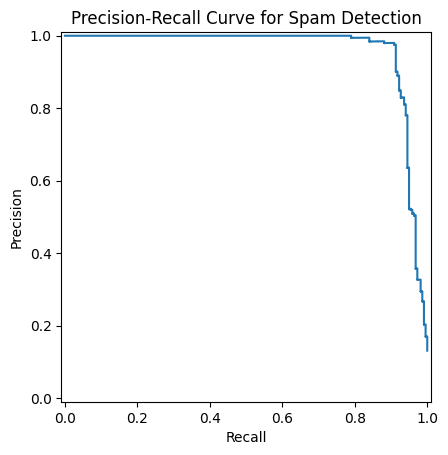

In [24]:
# Cell 6: Plot Precision-Recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve for Spam Detection')
plt.show()
